### Sum of Exponentially Distributed Random Variables

Let $\{x_i\}$ be a collection of $n$ independent and identically distributed random variables with exponential distribution:

\begin{equation}
X_i \sim \lambda e^{-\lambda x}\Theta(x)
\end{equation}

Where $\Theta(\cdot)$ is the Heaviside unit step function. Define a new random variable, $S$, where $S = \sum^n_i X_i$.

This can be done by writing down the joint probability distribution $p(S,X_1,...,X_n)$ using the Dirac Delta function and then obtain $p(S)$ through marginalization. The first of the $n$ integrals is easy because of the Delta function:

\begin{equation}
\begin{array}{ll}
p(S) &= \int dX^n \ \underbrace{\prod_i^n \left[ \lambda e^{-\lambda X_i}\Theta(X_i) \right]}_{p(X_1,...,X_n)}\ \underbrace{\delta(S-\sum^n_i X_i)}_{P(S|X_1,...,X_n)}\\
&= \lambda^n \int dX^{n-1} e^{-\lambda (\sum_i^{n-1}X_i)} e^{-\lambda(s-\sum_i^{n-1}X_i)}\left[\prod_i^{n-1}\Theta(X_i)\right]\Theta(s-\sum_i^{n-1}X_i)
\end{array}
\end{equation}

Note that the sums in the exponential will cancel in a way that allows it to be removed from the integral. What remains to solve is an integral over a product of Heaviside functions.

\begin{equation}
\begin{array}{ll}
p(S) &= \lambda^n e^{-\lambda s} \int \mathrm{d}X^{n-1} \left[\prod_i^{n-1}\Theta(X_i)\right]\Theta(s-\sum_i^{n-1}X_i)
\end{array}
\end{equation}

The integral will be a product of the lengths of $n-1$ coordinate intervals where the Heaviside functions have support.

\begin{equation}
\begin{array}{ll}
&\ \int \mathrm{d}X^{n-1} \underbrace{\left[\prod_i^{n-1}\Theta(X_i)\right]\Theta(s-\sum_i^{n-1}X_i)}_{I_{n-1}}\\
&= \int\mathrm{d}X^{n-2} \left[\left[\prod_i^{n-2}\Theta(X_i)\right]X_{n-1}\right]_{(0,\infty)\cap(-\infty,s-\sum_i^{n-2}X_i)}\\
&= \int\mathrm{d}X^{n-2} \underbrace{\left[\prod_i^{n-2}\Theta(X_i)\right]\Theta(s-\sum_i^{n-2}X_i)\left(s-\sum_i^{n-2}X_i\right)}_{I_{n-2}}\\
&= \int\mathrm{d}X^{n-3} \underbrace{\left[\prod_i^{n-3}\Theta(X_i)\right]\Theta(s-\sum_i^{n-3}X_i)\frac{1}{2}\left(s-\sum_i^{n-3}X_i\right)^2}_{I_{n-3}}\\
&\vdots\\
&= \int\mathrm{d}X^{n-m} \underbrace{\left[\prod_i^{n-m}\Theta(X_i)\right]\Theta(s-\sum_i^{n-m}X_i)\frac{1}{(m-1)!}\left(s-\sum_i^{n-m}X_i\right)^{m-1}}_{I_{n-m}}\\
&\vdots\\
&=\frac{1}{(n-1)!}s^{n-1}\Theta(s)
\end{array}
\end{equation}

Where, in the third row, the length of the interval $(0,\infty)\cap(-\infty,s-\sum_i^{n-2}X_i)$ is expressed as $\Theta(s-\sum_i^{n-2}X_i)\left(s-\sum_i^{n-2}X_i\right)$.

The expression for the probability of seeing $n$ independent and identically distributed, exponentially distribued random variables with parameter $\lambda$, add up to a sum $S$, is then:

\begin{equation}
p(S) = \frac{s^{n-1}\lambda^n}{(n-1)!} e^{-\lambda s}\Theta(s)
\end{equation}

For $n=1$, this reduces to the expression of a single exponentially distributed random variable.

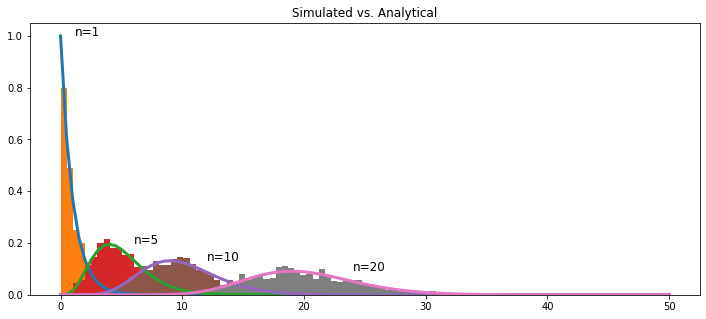

In [26]:
import numpy as np
import matplotlib.pyplot as plt


def factorial(x):
    if x == 0:
        return 1
    else:
        res = 1
        for i in range(1,x+1):
            res *= i
        return res
    

def p_S(s,n):
    """
    Analytical solution for the sum of n exponentially distributed random variables
    """
    if s < 0:
        return 0
    else:
        return (s**(n-1)*lam**n*np.exp(-lam*s))/factorial(n-1)
    
    
lam = 1
ss = np.linspace(0,50,100)
nn = [1,5,10,20]

"""
Simulated data
"""
N = 1000
data = np.random.exponential(scale=lam,size=(max(nn),N))


"""
Plotting
"""
plt.figure(figsize=(12,5))
for n in nn:
    x = [p_S(s,n) for s in ss]
    plt.plot(ss,x,linewidth=3)
    res = np.sum(data[:n],axis=0)
    plt.hist(res,density=True,bins=ss)
    plt.text(1.2*n,max(x),'n='+str(n),Fontsize=12)
    
_ = plt.title('Simulated vs. Analytical')